In [2]:
pip install tensorflow

     |████████████████████████████████| 195.7 MB 58 kB/s 
     |████████████████████████████████| 42 kB 402 kB/s 
     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 132 kB 10.6 MB/s 
     |████████████████████████████████| 3.7 MB 9.0 MB/s 
     |████████████████████████████████| 2.9 MB 12.8 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 14.2 MB/s 
     |████████████████████████████████| 462 kB 9.0 MB/s 
     |████████████████████████████████| 6.0 MB 6.1 MB/s 
     |████████████████████████████████| 15.6 MB 235 kB/s 
     |████████████████████████████████| 97 kB 3.7 MB/s 
     |████████████████████████████████| 3.5 MB 4.2 MB/s 
     |████████████████████████████████| 288 kB 4.1 MB/s 
     |████████████████████████████████| 781 kB 3.2 MB/s 
     |████████████████████████████████| 147 kB 4.1 MB/s 
     |████████████████████████

In [ ]:
#Pytorch is by facebook and 
# Tensorflow is by Google. 
#keras : Keras is not a full fledge deep learning framework, it is just a wrapper around Tensorflow that provides some convenient APIs.
#keras is wrapper around Tensor flow, Microsoft CNTK, theano


In [4]:
import tensorflow as tf 
from tensorflow import keras #keras gives convinent api to use
import matplotlib.pyplot as plt 
import numpy as np 


In [9]:
#https://github.com/tensorflow/tensorflow/issues/33285

import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [10]:
 fashion_mnist = keras.datasets.mnist
 (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
len(X_train), len(X_test)

(60000, 10000)

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

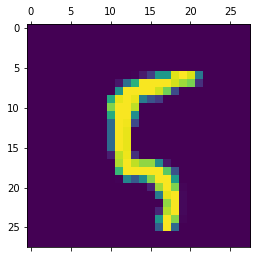

In [21]:
plt.matshow(X_train[100])

In [22]:
y_train[100]

5

In [23]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
X_train.shape


(60000, 28, 28)

In [34]:
X_train = X_train / 255
X_test = X_test / 255

In [35]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
#So the input here is a image, but we need it in nos. So we need to flatten it. Image is basically pixel rep. 0-255 . this image can be rep into grid 7*7 or 28*28 and faltten it into single array 
#pandas has reshape - which converts (60000, 28, 28) to (60000, 28*28) 784, 60000= no of images
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [30]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
#create simple neural network , ip layer , op layer 
# keras.Sequential = stack of layers in neural net . it accept every layer as one element
#dense = all neurons conneced with other neuron in 2nd layer

#our input has 784 input and 10 output
#compile and pass bunch of optimisers = allows to train efficiently. 
#sparse_categorical_crossentropy - output are categorical, oput variable y_train is int , 

In [39]:
model =  keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9258


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9268


[0.2672126591205597, 0.926800012588501]

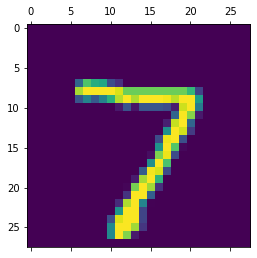

In [42]:
plt.matshow(X_test[0])

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

#numpy's argmax used to get max value 

array([2.3187310e-02, 5.5905264e-07, 6.7005455e-02, 9.5929790e-01,
       2.0257235e-03, 1.3605928e-01, 1.5444612e-06, 9.9981809e-01,
       1.0450110e-01, 6.6919088e-01], dtype=float32)

In [46]:
np.argmax(y_predicted[0])

7

In [47]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #prediction parameter for conf matrix. Since y_pred is a array like, so converting it to labels. 

[7, 2, 1, 0, 4]

In [48]:
y_test[:5] #truth parameter for confusion matrix

array([7, 2, 1, 0, 4], dtype=uint8)

In [49]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    1,    0,    5,    7,    4,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  930,   14,    7,    5,   12,    9,   34,    5],
       [   4,    0,   21,  907,    1,   37,    2,   10,   19,    9],
       [   1,    2,    2,    2,  908,    0,   14,    5,    8,   40],
       [   8,    2,    2,   15,   11,  800,   15,    5,   27,    7],
       [  11,    3,    7,    1,    7,   12,  914,    2,    1,    0],
       [   2,    7,   20,    7,    5,    0,    0,  958,    2,   27],
       [   8,   11,    7,   20,    9,   40,    9,   13,  848,    9],
       [  10,    7,    1,    7,   21,   10,    0,   25,    3,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

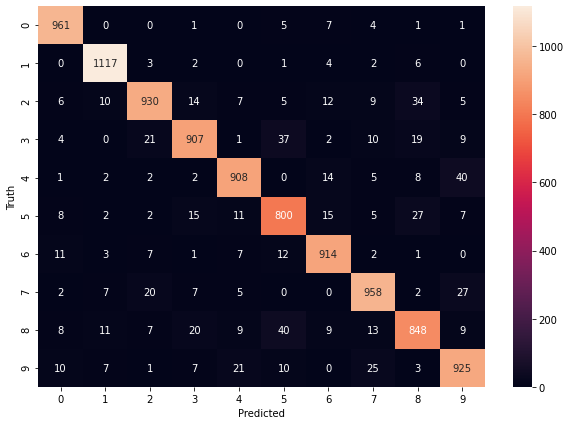

In [50]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Now we will add a hidden layer. Above was juts input and output. 
#adding hidden layers improves in the performance. 

In [51]:
model =  keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation= 'relu'), #hw many neurons u want. hidden layer
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid') #10 is output nos
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2758 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1265 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9843


In [52]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9725


[0.0828312560915947, 0.9725000262260437]

Text(69.0, 0.5, 'Truth')

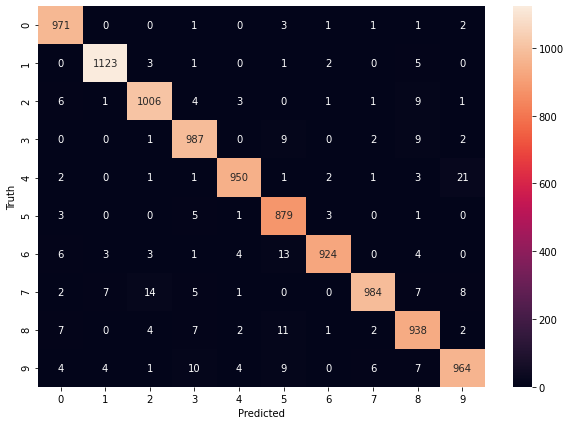

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#used same code that of without hidden layers, and see that with hiiden layers it is giving efficient results. 

In [57]:
#eliminating the usgae of flatten and using keras flatten layer

model =  keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100,activation= 'relu'), #hw many neurons u want. hidden layer
    keras.layers.Dense(10, activation= 'sigmoid') #10 is output nos
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2674 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1233 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0870 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0527 - accuracy: 0.9844


In [ ]:


#For hidden layers if not sure about which Activation to use, always go for Relu/Leaky ReLu as default choice.
#Sigmoid used for binary classification , 0 or 1 . Eg below

In [5]:
import math 

def sigmoid(x):
    return 1 / (1 + math.exp(-x))
    
sigmoid(100)

1.0

In [7]:
sigmoid(1)

0.7310585786300049

In [8]:
sigmoid(-56) 
#close to 0

4.780892883885469e-25

In [9]:
sigmoid(0.5)

0.6224593312018546

In [10]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [11]:
tanh(-56)

-1.0

In [12]:
tanh(50)

1.0

In [13]:
tanh(1)

0.7615941559557649

In [14]:
def relu(x):
    return max(0,x)

In [15]:
relu(-7)

0

In [16]:
relu(8)

8

In [19]:
def leaky_relu(x):
    return max(0.1 * x, x)

In [20]:
leaky_relu(9)

9

In [21]:
leaky_relu(-100)

-10.0

In [ ]:
#Calculus : https://www.mathsisfun.com/calculus/derivatives-rules.html
# Practise and learn from: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/3_derivatives/derivatives_exercise.md

In [ ]:
#Matrix Manipulation- https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/4_matrix_math/4_matrix_math.md

In [22]:
import numpy as np 
revenue = np.array([[180, 200, 220], [24,36,40], [12,18,20]])
expenses = np.array([[80,90,100], [10,16,20], [8,10,10]])

In [23]:
profit = revenue - expenses

In [24]:
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [25]:
#dot product
price_per_unit = np.array([1000, 400, 1200])
units = np.array([[30,40,50], [5,10,15], [2,5,7]])

In [26]:
np.dot(price_per_unit, units)

array([34400, 50000, 64400])

In [29]:
revenue_in_dollars = np.array([[200, 220, 250], [68, 79, 105], [110,140,180], [80,85,90]])
revenue_in_inr = np.dot(revenue_in_dollars,75)

In [30]:
revenue_in_inr

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])